__Shuffle__ — это процесс, при котором данные перемещаются между различными узлами в кластере Apache Spark. Этот процесс необходим для выполнения операций, которые требуют перераспределения данных между разделами (партициями), таких как join, groupBy, reduceByKey и другие агрегации.

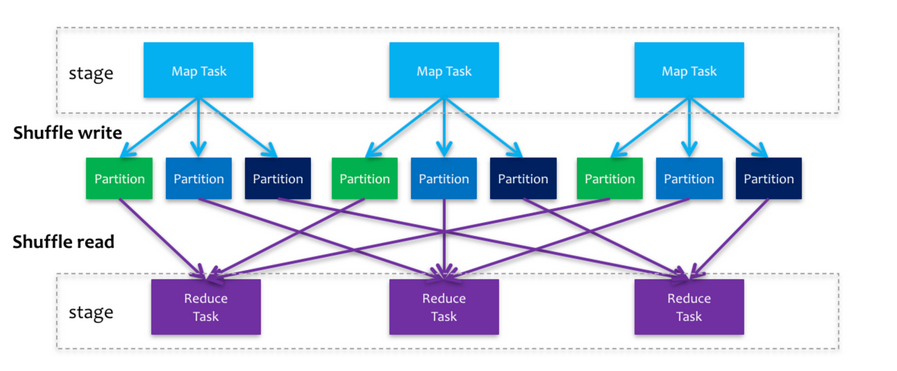

Партиции в процессе shuffle играют ключевую роль в распределении данных по узлам кластера. Каждая операция shuffle создает новые партиции, и количество этих партиций может быть настроено для оптимизации производительности.

In [4]:

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession,DataFrame
from pyspark.sql.functions import col, round, to_date, year, month, sum, avg

conf = (
     SparkConf()
    .setAppName('Simple_Spark')
    .setMaster('local[*]')
    .set("spark.sql.shuffle.partitions", "50") # 50 партиций
)


# Spark сессия
spark = (
    SparkSession
    .builder
    .config(conf=conf)
    # .enableHiveSupport()
    .getOrCreate()
)

24/09/15 10:25:22 WARN Utils: Your hostname, antonio-f513 resolves to a loopback address: 127.0.1.1; using 192.168.100.9 instead (on interface wlx1cbfcee6cd1b)
24/09/15 10:25:22 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/15 10:25:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
spark.conf.get("spark.sql.shuffle.partitions")

'50'

In [9]:
# Пример данных с большим объемом
data1 = [(i, f"Name_{i % 5}") for i in range(1000000)]
data2 = [(i, f"Category_{i % 3}") for i in range(1000000)]

df1 = spark.createDataFrame(data1, ["id", "name"])
df2 = spark.createDataFrame(data2, ["id", "category"])

In [11]:
# Проверяем начальное количество партиций
print(df1.rdd.getNumPartitions())
print(df2.rdd.getNumPartitions())

4
4


In [12]:
# Принудительно увеличиваем количество партиций перед join
df1_repartitioned = df1.repartition(50)
df2_repartitioned = df2.repartition(50)

In [13]:
# Проверяем количество партиций
print(df1_repartitioned.rdd.getNumPartitions())
print(df2_repartitioned.rdd.getNumPartitions())

24/09/15 10:34:40 WARN TaskSetManager: Stage 0 contains a task of very large size (3791 KiB). The maximum recommended task size is 1000 KiB.


50


24/09/15 10:34:43 WARN TaskSetManager: Stage 1 contains a task of very large size (4767 KiB). The maximum recommended task size is 1000 KiB.


50


In [14]:
# Выполняем операцию join, требующую shuffle
joined_df = df1_repartitioned.join(df2_repartitioned, "id")

In [15]:
# Проверяем количество партиций после join
joined_df.rdd.getNumPartitions()

4

In [16]:
spark.stop()